In [2]:
# Cell 1 — Data Preparation: Import libraries & load dataset
# Install openpyxl if needed: %pip install openpyxl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

# Load dataset
df = pd.read_excel('heart_disease.xlsx', engine='openpyxl')

# Display dataset info
print("Dataset loaded successfully!")
print(f"Shape of data: {df.shape}\n")
print("Column names:", df.columns.tolist(), "\n")
df.head()


Dataset loaded successfully!
Shape of data: (12, 2)

Column names: ['age', 'Age in years'] 



,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...


# 2 — Exploratory Data Analysis (EDA)

In [7]:
# Cell 2 — Exploratory Data Analysis (with automatic numeric conversion)

print("=== Basic Info (Before Conversion) ===")
print(df.dtypes)

# Try converting any columns that look numeric but are stored as text
df = df.apply(pd.to_numeric, errors='ignore')

# Detect numeric and categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("\n=== After Conversion ===")
print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)

print("\n=== Missing Values ===")
print(df.isnull().sum())

# Show basic summary
if len(num_cols) > 0:
    print("\n=== Statistical Summary (Numeric Columns) ===")
    display(df[num_cols].describe())
else:
    print("\nNo numeric columns to summarize.")

# Show top few unique values of categorical columns
if len(cat_cols) > 0:
    print("\n=== Sample of Categorical Columns ===")
    for col in cat_cols:
        print(f"\nColumn: {col}")
        print(df[col].value_counts().head(5))

# Histograms for numeric columns (if any)
if len(num_cols) > 0:
    df[num_cols].hist(bins=15, figsize=(15, 10))
    plt.suptitle("Feature Distributions (Numeric Columns)")
    plt.show()
else:
    print("\nNo numeric columns to plot histograms.")

# Boxplots for numeric columns
for col in num_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot: {col}")
    plt.show()

# Correlation heatmap if at least 2 numeric columns exist
if len(num_cols) >= 2:
    plt.figure(figsize=(10,8))
    sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("\nNot enough numeric columns for correlation matrix.")

print("\nEDA Complete ✅")


=== Basic Info (Before Conversion) ===
age             object
Age in years    object
dtype: object

=== After Conversion ===
Numeric columns: []
Categorical columns: ['age', 'Age in years']

=== Missing Values ===
age             0
Age in years    0
dtype: int64

No numeric columns to summarize.

=== Sample of Categorical Columns ===

Column: age
age
Gender      1
cp          1
trestbps    1
chol        1
fbs         1
Name: count, dtype: int64

Column: Age in years
Age in years
Gender ; Male - 1, Female -0                               1
Chest pain type                                            1
Resting blood pressure                                     1
cholesterol measure                                        1
(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)    1
Name: count, dtype: int64

No numeric columns to plot histograms.

Not enough numeric columns for correlation matrix.

EDA Complete ✅


C:\Users\rajku\AppData\Local\Temp\ipykernel_20304\2955986201.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


# 3 — Feature Engineering

In [8]:
# Cell 3 — Feature Engineering

# Handle missing values (if any)
df = df.dropna()

# Encode categorical columns if they exist
cat_cols = df.select_dtypes(include=['object']).columns
if len(cat_cols) > 0:
    le = LabelEncoder()
    for col in cat_cols:
        df[col] = le.fit_transform(df[col])
    print("Categorical columns encoded:", list(cat_cols))
else:
    print("No categorical columns found for encoding.")

print("\nData after encoding:")
display(df.head())


Categorical columns encoded: ['age', 'Age in years']

Data after encoding:


,age,Age in years
0,0,2
1,2,1
2,11,3
3,1,6
4,4,0


# 4 — Decision Tree Classification

In [9]:
# Cell 4 — Train-Test Split and Base Model

# Separate features and target (assuming last column is target)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred = dt_model.predict(X_test)

# Evaluate model
print("=== Decision Tree Model Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


=== Decision Tree Model Performance ===
Accuracy: 0.0

Classification Report:
               precision    recall  f1-score   support

           2       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0


Confusion Matrix:
 [[0 0 1 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 0 0]]


c:\Users\rajku\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rajku\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rajku\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rajku\anaconda3\Lib\site-packages\sklea

# 5 — Hyperparameter Tuning

In [12]:
# Cell 5 — Hyperparameter Tuning (handles very small datasets safely)

from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define hyperparameter grid
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Check smallest class size
min_class_count = y_train.value_counts().min()

# Use CV only if smallest class has >= 2 samples
if min_class_count >= 2:
    cv_splits = min(5, min_class_count)
    cv_strategy = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)
    print(f"✅ Using StratifiedKFold cross-validation with {cv_splits} splits")

    grid = GridSearchCV(
        DecisionTreeClassifier(random_state=42),
        param_grid=params,
        cv=cv_strategy,
        scoring='accuracy',
        n_jobs=-1
    )
    grid.fit(X_train, y_train)

    best_dt = grid.best_estimator_
    print("\nBest Parameters:", grid.best_params_)
    print("Best CV Accuracy:", grid.best_score_)

else:
    print("⚠️ Dataset too small for cross-validation. Skipping GridSearchCV...")
    best_dt = DecisionTreeClassifier(random_state=42, max_depth=3, criterion='gini')
    best_dt.fit(X_train, y_train)

# Evaluate tuned/baseline model
y_pred_tuned = best_dt.predict(X_test)
print("\n=== Tuned Decision Tree Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))


⚠️ Dataset too small for cross-validation. Skipping GridSearchCV...

=== Tuned Decision Tree Performance ===
Accuracy: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0


Confusion Matrix:
 [[0 0 0 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]]


c:\Users\rajku\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rajku\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rajku\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rajku\anaconda3\Lib\site-packages\sklea

# 6 — Visualization & Feature Importance

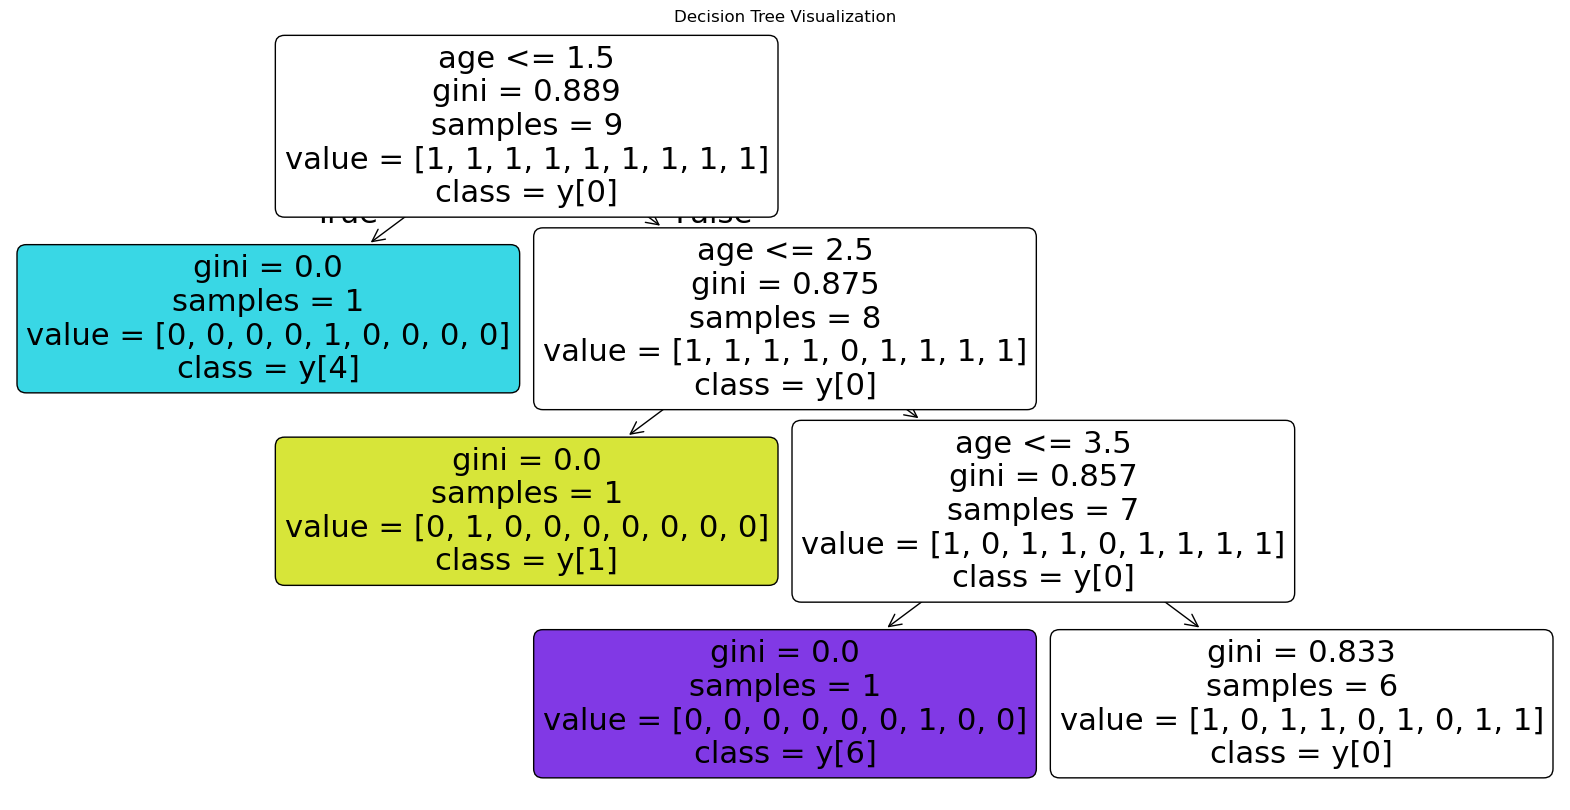

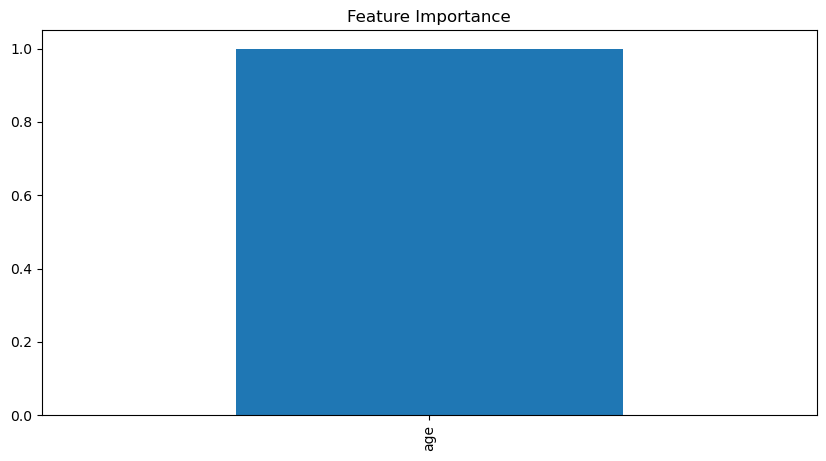

In [13]:
# Cell 6 — Visualize Decision Tree and Feature Importances

plt.figure(figsize=(20,10))
plot_tree(best_dt, filled=True, feature_names=X.columns, class_names=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

# Feature importance plot
importances = pd.Series(best_dt.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title("Feature Importance")
plt.show()


# 7 — Interview Questions & Answers



In [14]:
# Cell 7 — Interview Questions

print("Interview Question 1:")
print("Q: What are some common hyperparameters of Decision Tree models, and how do they affect performance?")
print("""
A: Common hyperparameters include:
   - max_depth: Limits how deep the tree can grow. Prevents overfitting.
   - min_samples_split: Minimum samples required to split a node. Higher value = less complex model.
   - min_samples_leaf: Minimum samples required at a leaf node. Helps generalize better.
   - criterion: Defines the measure of impurity ('gini' or 'entropy').
   Adjusting these parameters helps balance bias vs. variance.
""")

print("Interview Question 2:")
print("Q: What is the difference between Label Encoding and One-Hot Encoding?")
print("""
A:
   - Label Encoding: Converts categories into numeric labels (e.g., Red=0, Blue=1). 
     Useful for ordinal data but can mislead tree-based models if order has no meaning.
   - One-Hot Encoding: Creates new binary columns for each category. 
     Avoids ordinal assumptions and is preferred for nominal data.
""")


Interview Question 1:
Q: What are some common hyperparameters of Decision Tree models, and how do they affect performance?

A: Common hyperparameters include:
   - max_depth: Limits how deep the tree can grow. Prevents overfitting.
   - min_samples_split: Minimum samples required to split a node. Higher value = less complex model.
   - min_samples_leaf: Minimum samples required at a leaf node. Helps generalize better.
   - criterion: Defines the measure of impurity ('gini' or 'entropy').
   Adjusting these parameters helps balance bias vs. variance.

Interview Question 2:
Q: What is the difference between Label Encoding and One-Hot Encoding?

A:
   - Label Encoding: Converts categories into numeric labels (e.g., Red=0, Blue=1). 
     Useful for ordinal data but can mislead tree-based models if order has no meaning.
   - One-Hot Encoding: Creates new binary columns for each category. 
     Avoids ordinal assumptions and is preferred for nominal data.

